<a href="https://colab.research.google.com/github/huakim/libtrashcan/blob/master/blank_03_autograd_optim_nn_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import annotations

from pathlib import Path

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression

%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

## 3.1 Автоматическое дифференцирование в `torch`

In [ ]:
w = torch.tensor([1., 2.], requires_grad=True)
x = torch.tensor([2., 3.])

L = w @ x
L.backward()

with torch.no_grad():
    w -= w.grad

w.grad.zero_()
w.grad

tensor([0., 0.])

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [ ]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)



3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [ ]:
class MSELoss:
    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        assert y_pred.ndim == y_true.ndim == 2, f'Ожидалось 2 измерений у y_pred, y_true, получил {y_pred.ndim}, {y_true.ndim}'
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2).mean()


class Linear:
    inputs: torch.Tensor | None = None
    def __init__(self, n_features: int, n_outputs: int) -> None:
        self.weights = torch.randn(n_features, n_outputs, requires_grad=True)
        self.bias = torch.randn(1, n_outputs, requires_grad=True)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        self.inputs = inputs
        return inputs @ self.weights + self.bias


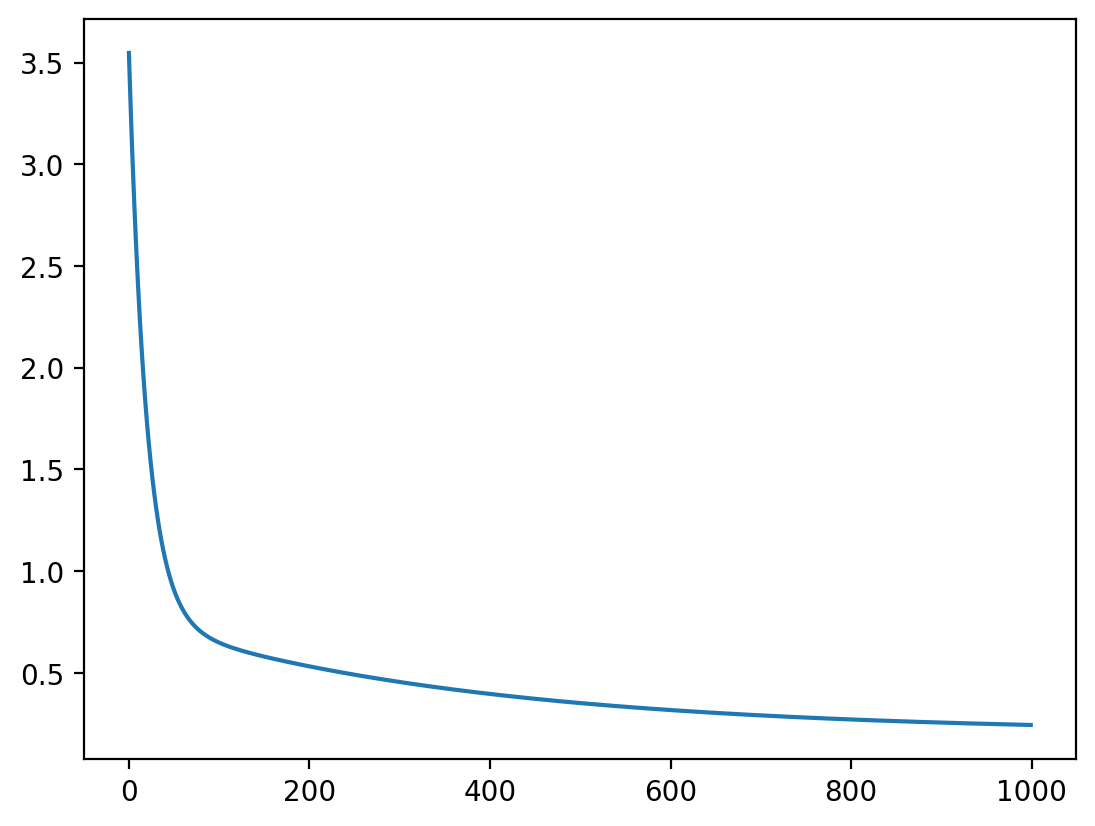

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

n_features = X.shape[1]
n_outputs = y.shape[1]

model = Linear(n_features=n_features, n_outputs=n_outputs)

learning_rate = 1e-2
optimizer = torch.optim.SGD([model.weights, model.bias], lr=learning_rate)

loss = MSELoss()
num_epochs = 1000

loss_vals: list[float] = []

for _ in range(num_epochs):
    pred = model.forward(X)
    loss_val = loss.forward(y_pred=pred, y_true=y)
    loss_val.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_vals.append(loss_val.item())

plt.plot(loss_vals);

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

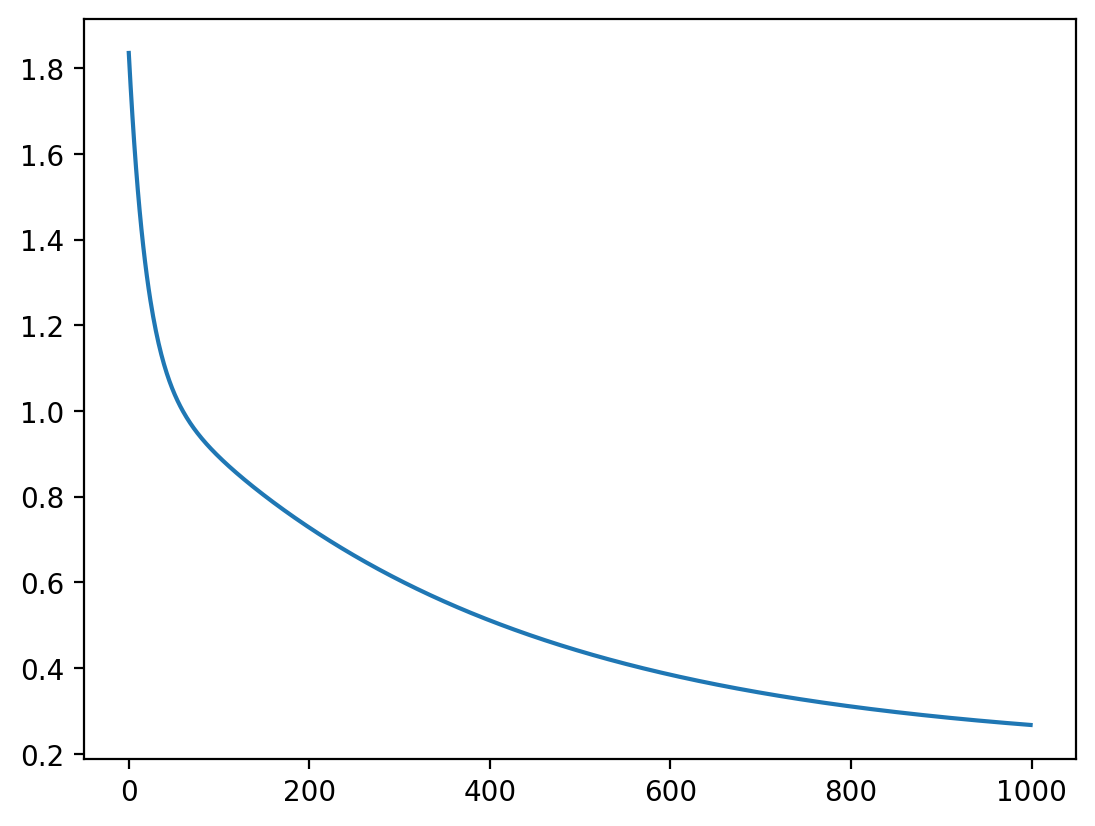

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

n_features = X.shape[1]
n_outputs = y.shape[1]

model = Linear(n_features=n_features, n_outputs=n_outputs)

learning_rate = 1e-2
optimizer = torch.optim.SGD([model.weights, model.bias], lr=learning_rate)

loss = MSELoss()
num_epochs = 1000

loss_vals: list[float] = []

for _ in range(num_epochs):
    pred = model.forward(X)
    loss_val = loss.forward(y_pred=pred, y_true=y)
    loss_val.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_vals.append(loss_val.item())

plt.plot(loss_vals);

3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

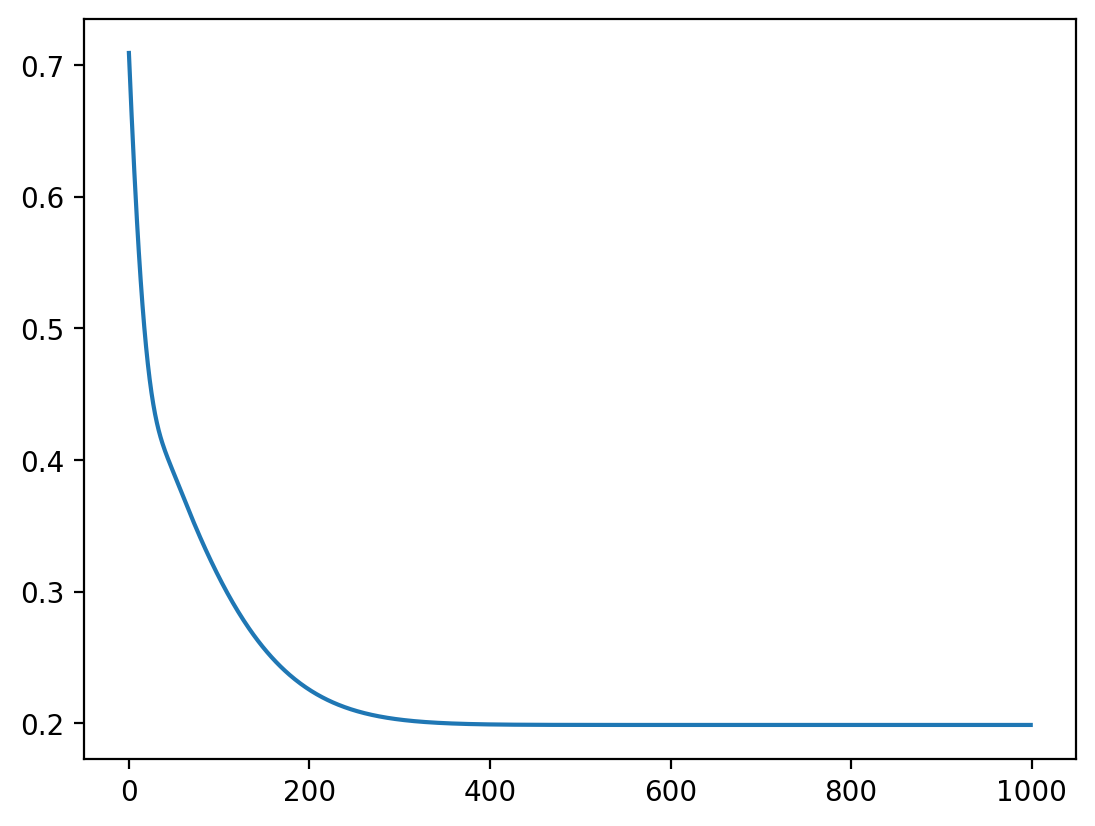

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

n_features = X.shape[1]
n_outputs = y.shape[1]

model = Linear(n_features=n_features, n_outputs=n_outputs)

learning_rate = 1e-2
optimizer = torch.optim.Adam([model.weights, model.bias], lr=learning_rate)

loss = MSELoss()
num_epochs = 1000

loss_vals: list[float] = []

for _ in range(num_epochs):
    pred = model.forward(X)
    loss_val = loss.forward(y_pred=pred, y_true=y)
    loss_val.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_vals.append(loss_val.item())

plt.plot(loss_vals);

## 3.3 Построение сетей при помощи `torch.nn`

In [ ]:
class Model(nn.Module):
    def __init__(self, n_features: int, n_outputs: int) -> None:
        super().__init__()
        self.layer1 = nn.Linear(n_features, 3)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(3, n_outputs)

        # Просто пример
        self.custom_weight = nn.Parameter(torch.tensor([1.]))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x


model = Model(n_features=n_features, n_outputs=n_outputs)
list(model.parameters())

[Parameter containing:
 tensor([1.], requires_grad=True),
 Parameter containing:
 tensor([[-0.0855],
         [ 0.9150],
         [-0.4631]], requires_grad=True),
 Parameter containing:
 tensor([-0.1465,  0.2453,  0.1157], requires_grad=True),
 Parameter containing:
 tensor([[-0.0455,  0.3883, -0.4642]], requires_grad=True),
 Parameter containing:
 tensor([0.5587], requires_grad=True)]

In [ ]:
model = nn.Sequential(
    nn.Linear(n_features, 3),
    nn.ReLU(),
    nn.Linear(3, n_outputs),
)

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

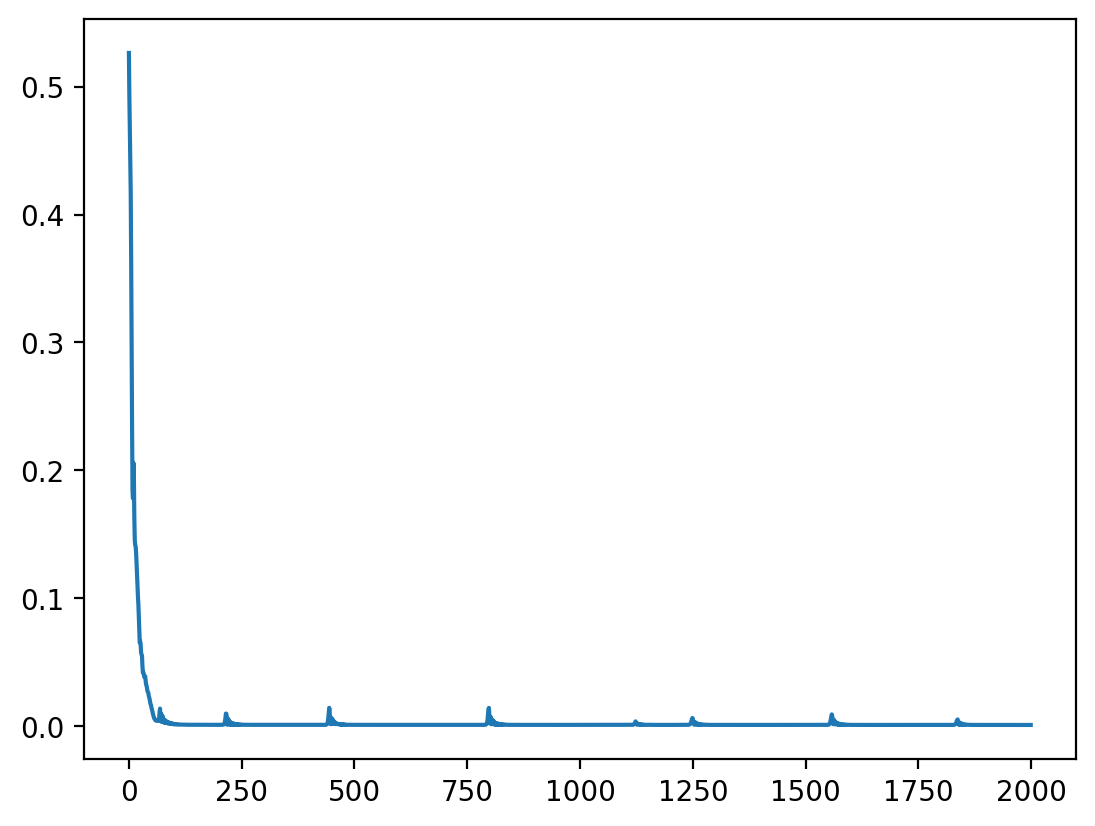

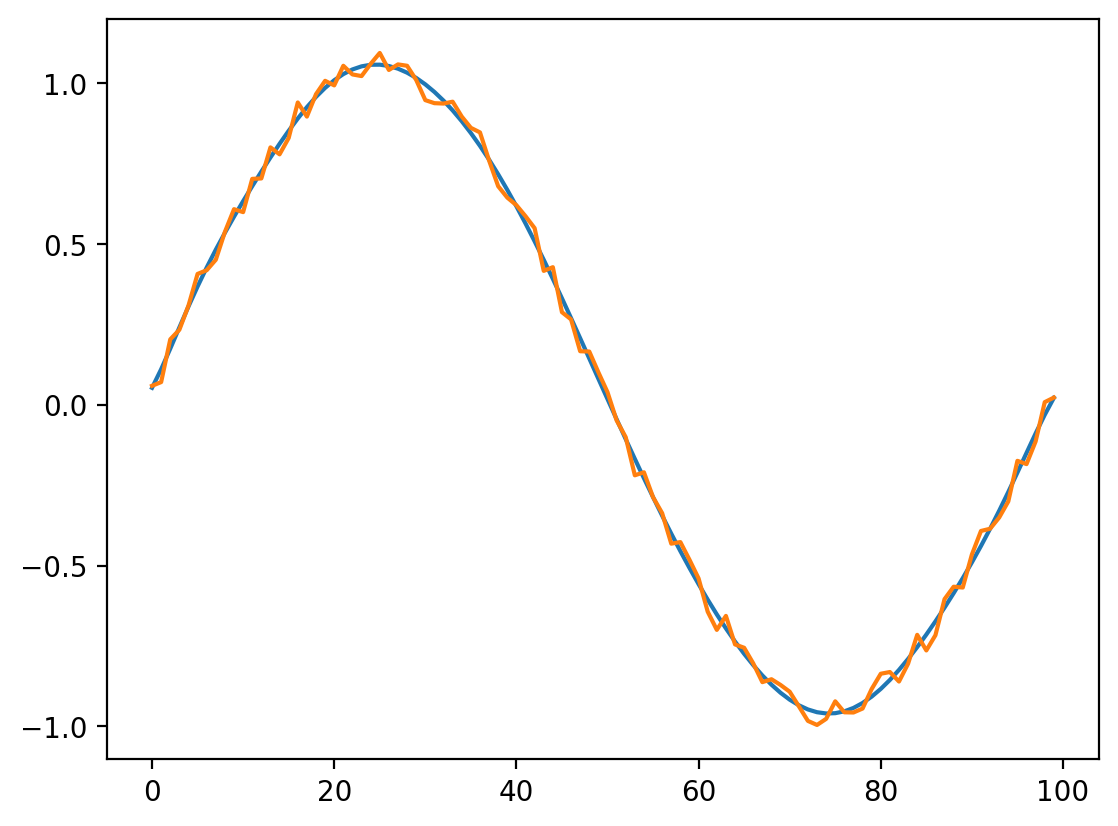

In [ ]:
class Model(nn.Module):
    def __init__(self, n_features: int, n_outputs: int) -> None:
        super().__init__()
        self.body = nn.Sequential(
            nn.Linear(n_features, 100),
            nn.GELU(),
            nn.Linear(100, 100),
            nn.GELU(),
            nn.Linear(100, 100),
            nn.GELU(),
            nn.Linear(100, 3),
        )
        self.last_layer = nn.Sequential(
            nn.GELU(),
            nn.Linear(3, n_outputs),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.body(x)
        x = self.last_layer(x)

        return x


X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

n_features = X.shape[1]
n_outputs = y.shape[1]

model = Model(n_features=n_features, n_outputs=n_outputs)

learning_rate = 5e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss = nn.MSELoss()
num_epochs = 2000

loss_vals: list[float] = []

for epoch in range(num_epochs):
    pred = model.forward(X)
    loss_val = loss.forward(input=pred, target=y)
    loss_val.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_vals.append(loss_val.item())

plt.plot(loss_vals)
plt.show()
plt.plot(pred.detach())
plt.plot(y)
plt.show()

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Входные данные и целевые значения
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

# Определяем модель
model = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# Определяем функцию потерь и оптимизатор
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучаем модель
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.2357
Epoch [200/1000], Loss: 0.1647
Epoch [300/1000], Loss: 0.1476
Epoch [400/1000], Loss: 0.1315
Epoch [500/1000], Loss: 0.1169
Epoch [600/1000], Loss: 0.1019
Epoch [700/1000], Loss: 0.0868
Epoch [800/1000], Loss: 0.0719
Epoch [900/1000], Loss: 0.0579
Epoch [1000/1000], Loss: 0.0453


## 3.4. Datasets and dataloaders

In [ ]:
from torch.utils.data import Dataset, DataLoader

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2.

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np

class SinDataset(Dataset):
    def __init__(self, num_samples=1000, amplitude=1.0, frequency=1.0, phase=0.0, noise_std=0.1):
        self.num_samples = num_samples
        self.amplitude = amplitude
        self.frequency = frequency
        self.phase = phase
        self.noise_std = noise_std

        self.x = torch.linspace(0, 2 * np.pi, num_samples)
        self.y = self.amplitude * torch.sin(self.frequency * self.x + self.phase) + torch.randn(num_samples) * self.noise_std

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv.

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`).

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке.


In [ ]:
import torch
import pandas as pd

# Загрузка данных из файла
df = pd.read_csv('diamonds.csv')

# Удаление нечисловых столбцов
df = df.select_dtypes(include=['float64', 'int64'])

# Целевой столбец - price
X = df.drop('price', axis=1)
y = df['price']

# Преобразование в тензоры
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

In [ ]:
from torch.utils.data import random_split

# Разбиение на обучающий и тестовый датасеты
train_size = int(0.8 * len(X_tensor))
test_size = len(X_tensor) - train_size

train_X = X_tensor[:train_size]
test_X = X_tensor[train_size:]
train_y = y_tensor[:train_size]
test_y = y_tensor[train_size:]

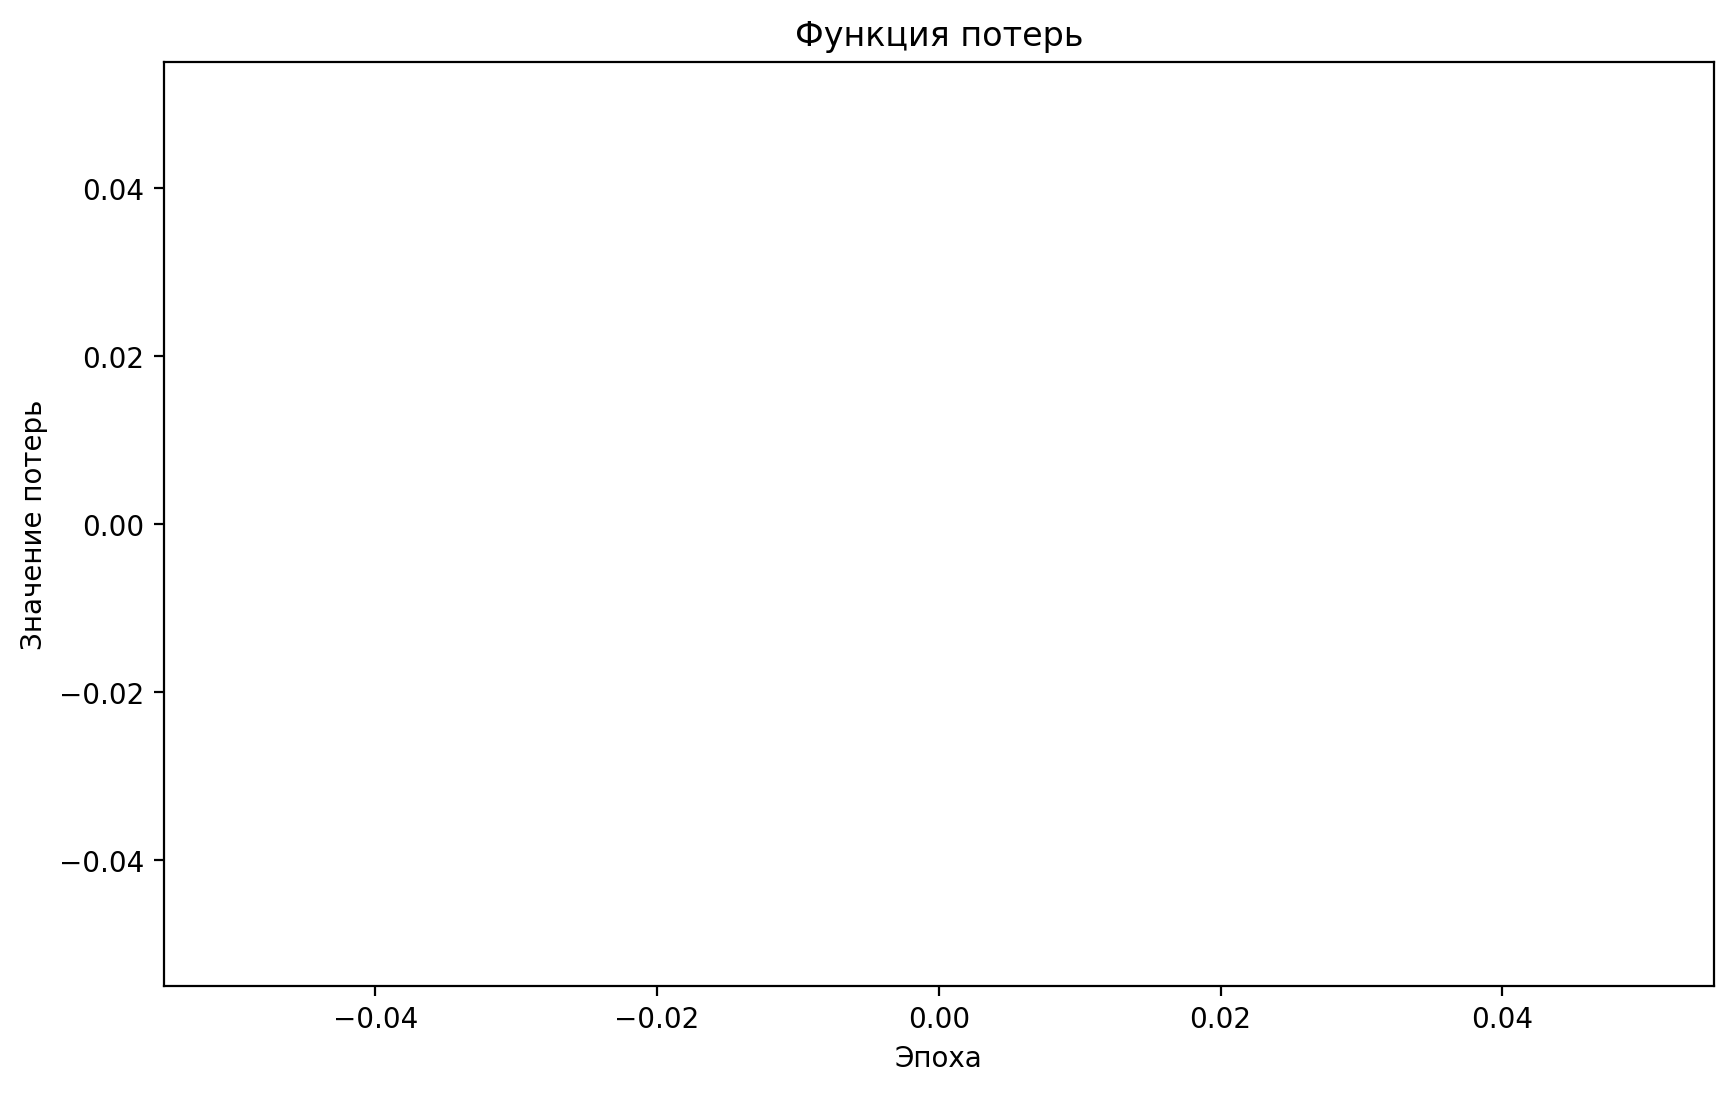

Ошибка на тестовой выборке: nan


In [ ]:
# Обучение модели
model = nn.Linear(X_tensor.size(1), 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
batch_size = 256

train_losses = []
for epoch in range(num_epochs):
    # Итерация по батчам
    for i in range(0, len(train_X), batch_size):
        batch_X = train_X[i:i+batch_size]
        batch_y = train_y[i:i+batch_size]

        # Прямой проход
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.unsqueeze(1))

        # Обратный проход и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Расчет среднего значения ошибки на эпохе
    train_loss = loss.item()
    train_losses.append(train_loss)

# Визуализация функции потерь
plt.figure(figsize=(10, 6))
plt.plot(train_losses)
plt.title('Функция потерь')
plt.xlabel('Эпоха')
plt.ylabel('Значение потерь')
plt.show()

# Оценка качества модели на тестовой выборке
with torch.no_grad():
    test_outputs = model(test_X)
    test_loss = criterion(test_outputs, test_y.unsqueeze(1)).item()
    print(f'Ошибка на тестовой выборке: {test_loss:.4f}')

3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [ ]:
class DiamondsDataset(Dataset):
  def __init__(self, data, transform):
    # ....
    self.transform = transform
    # ....

  def __len__(self):
    pass

  def __getitem__(self, idx):
    # ...
    sample = self.X[idx], self.y[idx]
    if self.transform:
      sample = self.transform(sample)
    # ....

In [ ]:
class DropColsTransform:
  def __init__(self, drop):
    pass

  def __call__(self, sample):
    X, y = sample
    # <удаление из X столбцов self.drop>
    return X, y

In [ ]:
class ToTensorTransform:
  def __call__(self, sample):
    X, y = sample
    # <преобразование X и y в тензоры>
    return X, y

In [ ]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset(data, transforms.compose([drop, to_tensor]))
